In [37]:
import os
import seaborn as sns

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [38]:
customer_df=pd.read_csv("AdvWorksCusts.csv")
spendings_df=pd.read_csv("AW_AveMonthSpend.csv")
bikebuyers_df=pd.read_csv('AW_BikeBuyer.csv')
test_df=pd.read_csv('AW_test.csv')

In [39]:
print(customer_df.shape)
customer_df.head()

(16519, 23)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [40]:
print(spendings_df.shape)
spendings_df.head().T
spendings_df.describe()

(16519, 2)


,CustomerID,AveMonthSpend
count,16519.000000,16519.000000
mean,20234.225195,72.405957
std,5342.515987,27.285370
min,11000.000000,22.000000
25%,15604.500000,52.000000
50%,20221.000000,68.000000
75%,24860.500000,84.000000
max,29482.000000,176.000000


In [41]:
print(bikebuyers_df.shape)
bikebuyers_df.head().T
bikebuyers_df['BikeBuyer'].value_counts()

(16519, 2)


0    11030
1     5489
Name: BikeBuyer, dtype: int64

# Cleaning Data

In [42]:
bikebuyers_df=bikebuyers_df.drop_duplicates(subset='CustomerID',keep='last')
bikebuyers_df.shape

(16404, 2)

# Merge Customer and Bike-buyers Data

In [43]:
customer_df=pd.merge(customer_df,bikebuyers_df)
customer_df=customer_df.drop_duplicates(subset='CustomerID',keep='last')
customer_df.shape

(16404, 24)

In [44]:
customer_df.describe(include='all')

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
count,16404.000000,88,16404,9453,16404,2,16404,273,16404,16404,...,16404,16404,16404,16404,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
unique,NaN,5,662,44,363,1,11874,154,267,51,...,5,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Mr.,Jennifer,A,Diaz,Jr.,Attaché de Presse,Verkaufsabteilung,London,California,...,Bachelors,Professional,M,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43,87,1142,190,2,15,28,379,3948,...,4758,4922,8290,8852,NaN,NaN,NaN,NaN,NaN,NaN
mean,20240.143136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.674104,1.499756,0.991100,2.004511,78129.672397,0.332541
std,5340.370705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.468723,1.139135,1.514278,1.682318,39728.383493,0.471138
min,11000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,9482.000000,0.000000
25%,15617.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,47808.750000,0.000000
50%,20231.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,76125.000000,0.000000
75%,24862.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,2.000000,2.000000,3.000000,105211.750000,1.000000


In [45]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16518
Data columns (total 24 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            273 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404

In [46]:
complete=[customer_df,test_df]

for item in complete:
    item["BirthDate"]=pd.to_datetime(item['BirthDate'], infer_datetime_format=True)
    item['Age']=1998-item['BirthDate'].dt.year
    
#customer_df['Age'].head(10)

# Visualizations

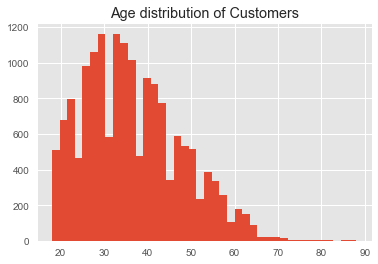

In [47]:
plt.title('Age distribution of Customers')
plt.hist(customer_df['Age'],bins=40)
plt.show()

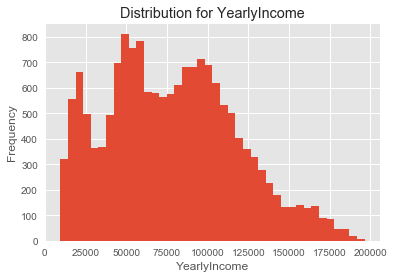

In [48]:
#sns.distplot(customer_df['YearlyIncome'], bins=20, rug=True, hist=True)
plt.hist(customer_df['YearlyIncome'],bins=40)
plt.title('Distribution for YearlyIncome')
plt.xlabel('YearlyIncome')
plt.ylabel('Frequency')
plt.show()

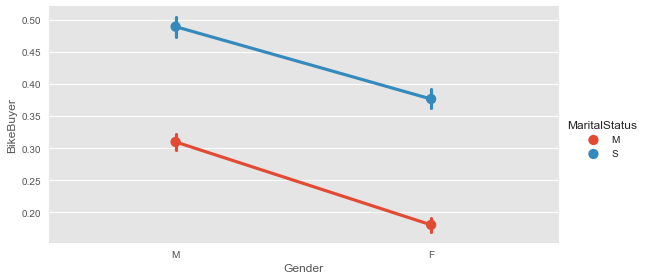

In [49]:
plt.style.use('ggplot')
sns.factorplot('Gender','BikeBuyer',hue='MaritalStatus',data=customer_df,aspect=2)

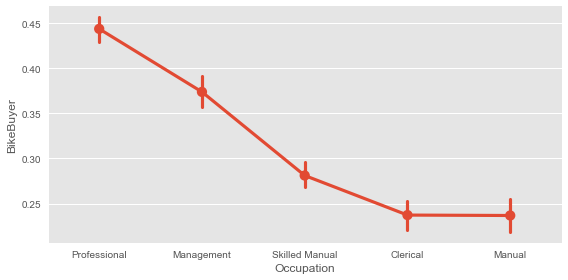

In [50]:
sns.factorplot('Occupation','BikeBuyer',data=customer_df,aspect=2)

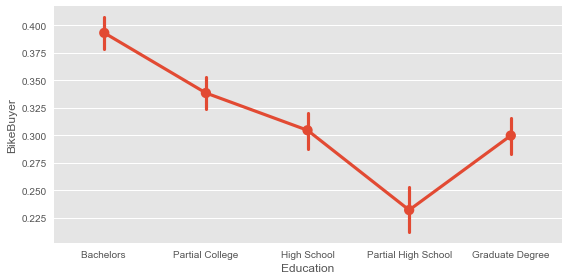

In [51]:
sns.factorplot('Education','BikeBuyer',data=customer_df,aspect=2)

In [52]:
#sns.set(style='darkgrid')
##plt.figure(figsize=(15,15))
#sns.boxplot(x=customer_df.columns,y=customer_df.columns.values,hue='BikeBuyer',data=customer_df)
#plt.xticks(rotation=90)

In [53]:
customer_df['CountryRegionName'].unique()

array(['Australia', 'United States', 'Canada', 'Germany', 'United Kingdom',
       'France'], dtype=object)

In [54]:
print(pd.isnull(customer_df).sum())
print('-'*40)
print(pd.isnull(test_df).sum())

CustomerID                  0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
BikeBuyer                   0
Age                         0
dtype: int64
----------------------------------------
CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0


In [55]:
null_cols=['BirthDate','Title', 'FirstName', 'LastName', 'AddressLine1', 'City','StateProvinceName', 'PostalCode',
           'PhoneNumber','NumberChildrenAtHome','MiddleName','Suffix','AddressLine2']
for item in complete:
    item=item.drop(null_cols,axis=1,inplace=True)
    
print(pd.isnull(customer_df).sum())

CustomerID           0
CountryRegionName    0
Education            0
Occupation           0
Gender               0
MaritalStatus        0
HomeOwnerFlag        0
NumberCarsOwned      0
TotalChildren        0
YearlyIncome         0
BikeBuyer            0
Age                  0
dtype: int64


In [56]:
cols=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 'TotalChildren']

customer_df=pd.get_dummies(customer_df, prefix=cols, columns=cols)

In [57]:
print(customer_df.shape)
customer_df.columns

(16404, 36)


Index(['CustomerID', 'HomeOwnerFlag', 'YearlyIncome', 'BikeBuyer', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_0', 'NumberCarsOwned_1',
       'NumberCarsOwned_2', 'NumberCarsOwned_3', 'NumberCarsOwned_4',
       'TotalChildren_0', 'TotalChildren_1', 'TotalChildren_2',
       'TotalChildren_3', 'TotalChildren_4', 'TotalChildren_5'],
      dtype='object')

In [58]:
cols=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 'TotalChildren']

test_df=pd.get_dummies(test_df, prefix=cols, columns=cols)
test_df.shape

(500, 35)

In [59]:
customer_df['Age']=np.log(customer_df['Age'])
customer_df['YearlyIncome']=(customer_df['YearlyIncome'])**0.5

test_df['Age']=np.log(test_df['Age'])
test_df['YearlyIncome']=(test_df['YearlyIncome'])**0.5
    
customer_df['YearlyIncome'].head()

0    371.412170
1    318.026728
2    303.224339
3    294.428260
4    304.583322
Name: YearlyIncome, dtype: float64

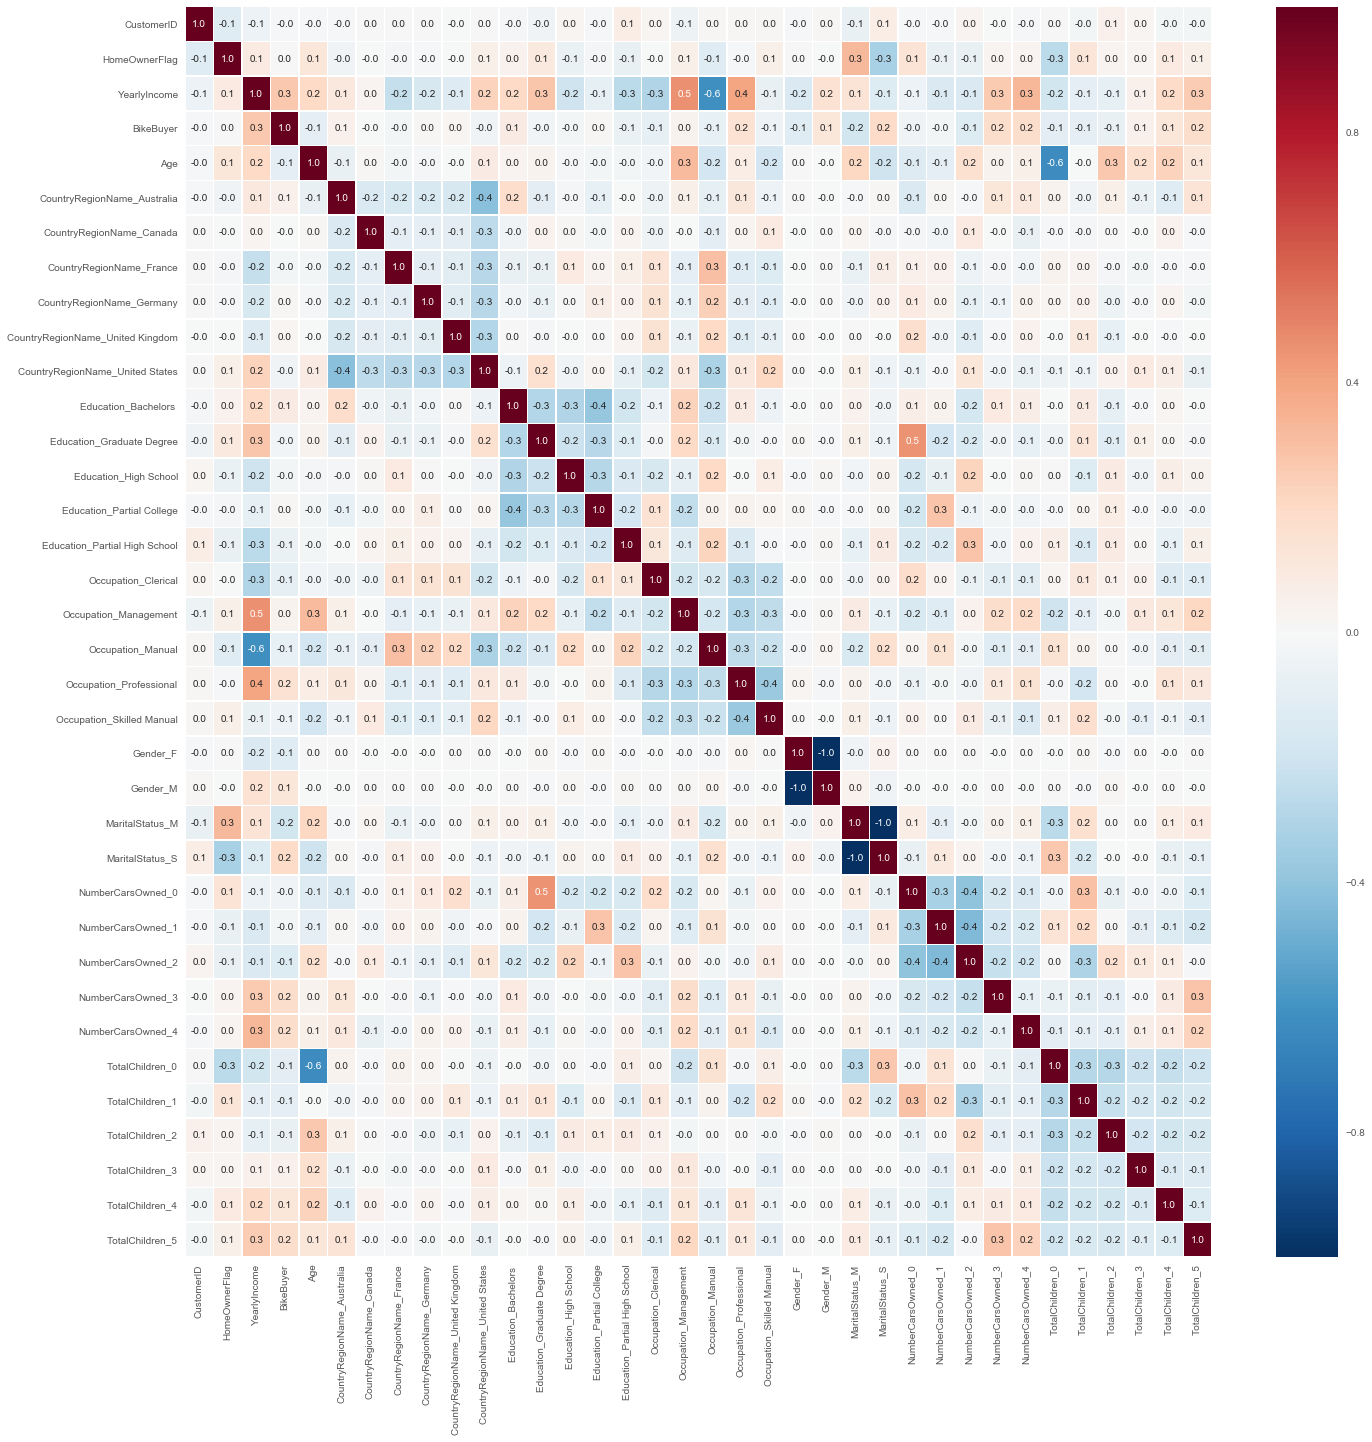

In [45]:
f,ax = plt.subplots(figsize=(23, 23))
sns.heatmap(customer_df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import sqrt

In [61]:
x=customer_df.drop(['BikeBuyer'],axis=1)
y=customer_df['BikeBuyer']
x.shape

(16404, 35)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
test=scaler.transform(test_df)

# Logistic Regression

In [64]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred=log_reg.predict(x_test)
log_reg_score=accuracy_score(log_reg_pred,y_test)
log_reg_score

0.76290125965054856

In [65]:
svc=SVC()
svc.fit(x_train, y_train)
svc_pred=svc.predict(x_test)
svc_score=accuracy_score(svc_pred,y_test)
svc_score

0.78321820398212105

In [66]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

print('                 Logistic Regression')
probabilities = log_reg.predict_proba(x_test)
print_metrics(y_test, probabilities, 0.6)

                 Logistic Regression
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3105               226
Actual negative       981               610

Accuracy        0.75
AUC             0.80
Macro precision 0.74
Macro recall    0.66
 
           Positive      Negative
Num case     3331          1591
Precision    0.76          0.73
Recall       0.93          0.38
F1           0.84          0.50


In [67]:
test_df.head()

,CustomerID,HomeOwnerFlag,YearlyIncome,Age,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,...,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,TotalChildren_0,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
0,18988,0,294.840635,3.970292,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,29135,1,316.425347,3.526361,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,12156,1,322.467053,4.158883,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,13749,1,356.596411,3.688879,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,27780,1,147.905375,3.496508,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [68]:
LR_solution=log_reg.predict(test)
LR_submission=pd.DataFrame({'CustomerID':test_df.CustomerID,'BikeBuyer': LR_solution})
LR_submission.to_csv('LogRegMicrosoftClassification.csv', index=False)

In [69]:
SVC_solution=svc.predict(test_df)
SVC_submission=pd.DataFrame({'CustomerID':test_df.CustomerID,'BikeBuyer': SVC_solution})
SVC_submission.to_csv('SVCMicrosoftClassification.csv', index=False)